In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import requests
import json
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

In [11]:
filepath = "data/abp_data.csv"

data = pd.read_csv(filepath)

In [12]:
data

,permitnumber,worktype,permittypedescr,description,comments,applicant,declared_valuation,total_fees,issued_date,expiration_date,...,occupancytype,sq_feet,address,city,state,zip,property_id,parcel_id,lat,long
0,A100071,COB,Amendment to a Long Form,City of Boston,Change connector link layout from attached enc...,Renee Santeusanio,40000.00,429.0,2011-11-04 11:04:58,2012-05-04 00:00:00,...,Comm,170.0,175 W Boundary RD,West Roxbury,MA,02132,17268,2012032000,42.260750,-71.149610
1,A1001012,OTHER,Amendment to a Long Form,Other,Amend Alt943748 to erect a roof deck as per pl...,Jusimar Oliveria,5000.00,70.0,2020-06-01 14:08:47,2020-12-01 00:00:00,...,1-3FAM,0.0,15 Prospect ST,Charlestown,MA,02129,113443,0202837000,42.375243,-71.057585
2,A1001201,INTEXT,Amendment to a Long Form,Interior/Exterior Work,Build steel balcony over garden level with sta...,Andreas Hwang,74295.75,803.0,2019-11-13 13:38:56,2020-05-13 00:00:00,...,Multi,0.0,211 W Springfield ST,Roxbury,MA,02118,129994,0402558000,42.340600,-71.080250
3,A100137,EXTREN,Amendment to a Long Form,Renovations - Exterior,Landscaping/stonework - amending permit #2801/...,NaN,15000.00,206.0,2013-01-03 14:13:09,2013-07-03 00:00:00,...,1-2FAM,0.0,14 William Jackson AVE,Brighton,MA,02135,149852,2204944000,42.344600,-71.154050
4,A1001913,INTREN,Amendment to a Long Form,Renovations - Interior NSC,Amendment to issued permit ALT888985. relocate...,Ping Mandawe,1.00,33.0,2019-10-18 09:21:00,2020-04-18 00:00:00,...,Comm,0.0,130-140 Brighton AVE,Allston,MA,02134,20073,2100846000,42.352760,-71.131850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478014,U49993435,OSEAT,Use of Premises,Outside Seating,Outdoor patio / amenity space for commercial o...,Christine McMahon,0.00,50.0,2019-09-25 11:36:11,2020-03-25 00:00:00,...,Mixed,0.0,3 Center Pz,Boston,MA,02108,154961,0302713000,42.359180,-71.060040
478015,U49993435,OSEAT,Use of Premises,Outside Seating,Outdoor patio / amenity space for commercial o...,Christine McMahon,0.00,50.0,2019-09-25 11:36:11,2020-03-25 00:00:00,...,Mixed,0.0,3 Center Pz,Boston,MA,02108,154961,0302717000,42.359180,-71.060040
478016,U49993492,TEMTRL,Use of Premises,Temporary Trailers,Temporary Construction Trailer at Herb Chamber...,Regina Olivieri,1000.00,53.0,2019-09-12 13:07:00,2020-03-12 00:00:00,...,Comm,0.0,1188 Commonwealth Av,Allston,MA,02134,424193,2101574010,NaN,NaN
478017,U4999352,DRIVE,Use of Premises,Driveway Installation,Owners would like to install a curb cut and a ...,Maria Dubrowski,2700.00,53.0,2012-05-30 14:28:59,2012-11-30 00:00:00,...,1-2FAM,0.0,46 Burroughs ST,Jamaica Plain,MA,02130,24047,1901861000,42.313220,-71.117130


In [13]:
data['permittypedescr'].unique()

array(['Amendment to a Long Form', 'Certificate of Occupancy',
       'Long Form/Alteration Permit', 'Electrical Permit',
       'Short Form Bldg Permit', 'Electrical Fire Alarms',
       'Electrical Low Voltage', 'Gas Permit',
       'Electrical Temporary Service', 'Erect/New Construction',
       'Excavation Permit', 'Foundation Permit', 'Plumbing Permit',
       'Use of Premises'], dtype=object)

In [14]:
data['worktype'].unique()

array(['COB', 'OTHER', 'INTEXT', 'EXTREN', 'INTREN', 'VIOL', 'ADDITION',
       'EXTDEM', 'FA', 'SPRINK', 'SIGNES', 'CELL', 'NEWCON', ' ', 'ERECT',
       'SPRNK9', 'SITE', 'SOL', 'FSTTRK', 'CHGOCC', 'SPCEVE', 'INTDEM',
       'General', 'CANP', 'AWNING', 'TCOO', 'ROOF', 'INSUL', 'GEN',
       'GARAGE', 'NROCC', 'SD', 'ELECTRICAL', 'PLUMBING', 'LVOLT',
       'FENCE2', 'SIDE', 'SIGNS', 'RESPAR', 'DRIVE', 'MAINT', 'TEMTRL',
       'INDBLR', 'SPFT', 'RNWSIG', 'COMPAR', 'AWNRNW', 'AWNRET', 'CANPRN',
       'RAZE', 'TMPSER', 'HOLVEN', 'OSEAT', 'FENCE', 'TMPUSOC', 'FLAM',
       'CONVRT', 'SRVCHG', 'Repair', 'TVTRK', 'BFCHMDECMA', 'Service',
       'Main', 'TRENCH', 'GAS', 'Capital', 'PVTEMER', 'New', 'INDFUR',
       'BFCHMTENT', 'BFCHMFLOOR', 'BFCHMINFIN', 'BFCHMTEMPE', 'Fencing',
       'SpecEvent', 'Dumpsters', 'BFCHMMATTR', 'Staging', 'SpeEvents'],
      dtype=object)

In [15]:
data.loc[data['worktype'] == 'ERECT']

,permitnumber,worktype,permittypedescr,description,comments,applicant,declared_valuation,total_fees,issued_date,expiration_date,...,occupancytype,sq_feet,address,city,state,zip,property_id,parcel_id,lat,long
200,A1048,ERECT,Amendment to a Long Form,Erect,Revise rear apartment layout. Add roof deck to...,Hugh Meehan,0.0,39.0,2010-03-30 11:51:01,2010-09-30 00:00:00,...,Mixed,0.0,1435-1437 Tremont ST,Mission Hill,MA,02120,172949,0902932002,42.331915,-71.096461
275,A107405,ERECT,Amendment to a Long Form,Erect,Adding 1 bedroom to top floor unit per approve...,Joe Hennessey,0.0,390.0,2012-02-28 15:46:37,2012-08-28 00:00:00,...,Multi,0.0,39-47 Sandpiper LN,Dorchester,MA,02124,343074,1405196010,NaN,NaN
276,A107407,ERECT,Amendment to a Long Form,Erect,Adding 1 bedroom to top floor unit per approve...,Joe Hennessey,0.0,270.0,2011-11-28 10:00:58,2012-08-28 00:00:00,...,Multi,0.0,74-76 Osprey WAY,Dorchester,MA,02124,343076,1405196010,NaN,NaN
444,A121115,ERECT,Amendment to a Long Form,Erect,Slab Foundation and related Site improvements...,Joshua Swerling,0.0,386.0,2012-04-18 09:45:56,2012-10-18 00:00:00,...,Comm,0.0,1833 Centre ST,West Roxbury,MA,02132,27732,2006346010,42.286860,-71.154040
445,A121135,ERECT,Amendment to a Long Form,Erect,Amend plans to the existing permit #ERT70819 ...,dren luci,12000.0,158.0,2012-04-12 14:59:18,2012-10-12 00:00:00,...,1-2FAM,0.0,109 Tudor ST,South Boston,MA,02127,138503,0600695000,42.336341,-71.053275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471339,SF95509,ERECT,Short Form Bldg Permit,Erect,"1-24x24x24"" stage with 1 set stairs and railin...",Boston Party Rental Inc,1350.0,40.0,2011-09-14 15:30:35,2012-03-14 00:00:00,...,VacLd,576.0,1 Jewish War Veterans DR,Jamaica Plain,MA,02121,163434,1203486000,42.301029,-71.088551
472003,SF96041,ERECT,Short Form Bldg Permit,Erect,Annual Erection of Harvard Stadium Air Support...,Christopher McCann,42000.0,440.0,2011-11-29 13:32:07,,...,Mixed,192000.0,79 N Harvard ST,Allston,MA,02134,168218,2200533000,42.366423,-71.126254
475958,SF99343,ERECT,Short Form Bldg Permit,Erect,remove rear stairs and replace same as existing,john mercer,5000.0,70.0,2011-10-06 08:40:56,2012-04-06 00:00:00,...,1-3FAM,3000.0,174 W Seventh ST,South Boston,MA,02127,125698,0600920000,42.334770,-71.051280
477044,U49228758,ERECT,Use of Premises,Erect,"Installing a ""Shelter Logic"" Shelter 35'x75'. ...",David Amato,60000.0,86.0,2013-12-18 09:05:42,2014-06-18 00:00:00,...,Comm,2625.0,450 William F Mcclellan HW,East Boston,MA,02128,0,,NaN,NaN


In [16]:
data.loc[data['worktype'] == 'NEWCON']

,permitnumber,worktype,permittypedescr,description,comments,applicant,declared_valuation,total_fees,issued_date,expiration_date,...,occupancytype,sq_feet,address,city,state,zip,property_id,parcel_id,lat,long
100,A102296,NEWCON,Amendment to a Long Form,New construction,Design change to the structural foundation of ...,Amy Sowersby,0.0,38.0,2011-11-25 11:10:19,2012-05-25 00:00:00,...,Comm,0.0,175 Berkeley ST,Boston,MA,02116,,,NaN,NaN
497,A13598,NEWCON,Amendment to a Long Form,New construction,1)Change 1st. fl.rear entrance from back of bu...,Howard Robinson,0.0,48.0,2010-02-12 10:46:43,2010-08-12 00:00:00,...,1-2FAM,2300.0,53 Circuit ST,Roxbury,MA,02119,341300,1201414000,NaN,NaN
501,A13611,NEWCON,Amendment to a Long Form,New construction,1)Change kitchen window location right and lef...,Howard Robinson,2000.0,83.0,2013-07-29 23:13:32,2014-01-29 00:00:00,...,7More,10000.0,55-59 Circuit ST,Roxbury,MA,02119,341301,1201414000,NaN,NaN
620,A176767,NEWCON,Amendment to a Long Form,New construction,Submitting MEP Plans and all Engineering Affid...,Anthony Ross,0.0,86.0,2017-03-23 15:59:21,2017-09-23 00:00:00,...,Mixed,18000.0,337-345 Belgrade AVE,Roslindale,MA,02131,13659,2001401000,42.286233,-71.145838
637,A18115,NEWCON,Amendment to a Long Form,New construction,Construct and fit-up of partial 4th floor prac...,Paul Pennie,625000.0,7445.0,2010-09-02 12:07:46,2011-03-02 00:00:00,...,Other,40910.0,31 Hemenway ST,Boston,MA,02115,72664,0401763000,42.345755,-71.089652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469184,SF93847,NEWCON,Short Form Bldg Permit,New construction,Install 6 ft (W) x12 ft (L) garden Storage She...,Kristopher Furlonge,1000.0,30.0,2011-09-02 09:23:58,2012-03-02 00:00:00,...,VacLd,72.0,108 Perham ST,West Roxbury,MA,02132,109223,2008388000,42.283040,-71.164880
470114,SF94544,NEWCON,Short Form Bldg Permit,New construction,sand and refinish floors. paint all walls and...,Paul quinn,25000.0,270.0,2011-09-07 14:50:42,2012-03-07 00:00:00,...,Comm,0.0,319-321 A ST,BOSTON,MA,02210,,0602761000,NaN,NaN
470115,SF94544,NEWCON,Short Form Bldg Permit,New construction,sand and refinish floors. paint all walls and...,Paul quinn,25000.0,270.0,2011-09-07 14:50:42,2012-03-07 00:00:00,...,Comm,0.0,319-321 A ST,BOSTON,MA,02210,,0602765010,NaN,NaN
477379,U49478253,NEWCON,Use of Premises,New construction,A temporary (two years);greenhouse will be ere...,Bruce Fulford,15000.0,53.0,2015-06-22 11:15:29,2015-12-22 00:00:00,...,Mixed,0.0,416 American Legion HWY,Dorchester,MA,02124,355859,1405198010,NaN,NaN


In [17]:
data.loc[data['permittypedescr'] == 'Erect/New Construction']

,permitnumber,worktype,permittypedescr,description,comments,applicant,declared_valuation,total_fees,issued_date,expiration_date,...,occupancytype,sq_feet,address,city,state,zip,property_id,parcel_id,lat,long
218892,ERT100078,ERECT,Erect/New Construction,Erect,Lift the existing building to relocate within ...,George Haroutunian,100000.0,1586.0,2012-07-20 09:37:53,2013-01-20 00:00:00,...,1Unit,0.0,39-45 Selkirk RD,Brighton,MA,02135,347861,2102228000,NaN,NaN
218893,ERT1005194,COB,Erect/New Construction,City of Boston,Engine # 42 -; Abatement and demolition of exi...,Brett E Watman,17000000.0,340486.0,2019-10-24 10:45:55,2020-04-24 00:00:00,...,Comm,0.0,1870 Columbus AVE,Roxbury,MA,02119,35505,1100946001,42.318403,-71.097757
218894,ERT100591,ERECT,Erect/New Construction,Erect,On Parcel 1803649000 containing 7800 square fe...,Joseph Vozzella,200000.0,2350.0,2013-02-25 13:45:35,2013-08-25 00:00:00,...,1-2FAM,1672.0,15 Rock RD,Hyde Park,MA,02136,,1803649000,NaN,NaN
218895,ERT10090,NEWCON,Erect/New Construction,New construction,Demolish and remove existing Building &;;slab;...,Richard Lynds,400000.0,8435.0,2010-09-23 13:59:52,2011-03-23 00:00:00,...,VacLd,3000.0,391 Market ST,Brighton,MA,02135,90279,2202416010,42.350250,-71.153170
218896,ERT100941,ERECT,Erect/New Construction,Erect,take down existing 1 family structure and;erec...,ANTONIO RUSCITO,225000.0,2342.0,2011-12-22 12:29:13,2012-06-22 00:00:00,...,1-2FAM,2400.0,31 Knoll ST,Roslindale,MA,02131,82348,2005092000,42.291690,-71.133430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221253,ERT996638,ERECT,Erect/New Construction,Erect,Construct a new Two ( 2 ) Family Dwelling.; Ea...,Joe DiSipio,435000.0,4466.0,2020-03-03 08:56:57,2020-09-03 00:00:00,...,1-2FAM,3031.0,55-57 Meyer St,Roslindale,MA,02131,438948,1904337009,NaN,NaN
221254,ERT998795,ERECT,Erect/New Construction,Erect,New construction consisting of 230 apartments ...,christopher wade,49650704.0,506779.0,2020-06-05 12:11:35,2020-12-05 00:00:00,...,Multi,215862.0,144 Addison St,East Boston,MA,02128,1127,0100548100,42.386660,-71.018400
221255,ERT999689,ERECT,Erect/New Construction,Erect,Combine 6 existing parcels into 1 lot and subd...,ANTONIO RUSCITO,350000.0,3631.0,2019-10-28 12:39:56,2020-04-28 00:00:00,...,1-2FAM,2583.0,22 Northdale Rd,West Roxbury,MA,02132,438992,2009932000,NaN,NaN
221256,ERT999690,ERECT,Erect/New Construction,Erect,COMBINE 6 EXISTING PARCELS INTO 1 LOT AND SUBD...,ANTONIO RUSCITO,350000.0,3631.0,2019-11-07 15:04:59,2020-05-07 00:00:00,...,1-2FAM,2484.0,30 Northdale Rd,West Roxbury,MA,02132,438991,2009929000,NaN,NaN


Here we have filtered out all the permits we don't care for. We can rerun our analysis from Deliverable 1

In [18]:
df = data.loc[(data['permittypedescr'] == 'Erect/New Construction') | (data['permittypedescr'] == 'Excavation Permit') | (data['permittypedescr'] == 'Foundation Permit') | (data['description'] == 'Excavation Borings Test Pits') | (data['description'] == 'New construction') | (data['description'] == 'Erect')]
applicants = pd.DataFrame(df['applicant'])
owners = pd.DataFrame(df['owner'])
applicants

,applicant
100,Amy Sowersby
200,Hugh Meehan
275,Joe Hennessey
276,Joe Hennessey
444,Joshua Swerling
...,...
475958,john mercer
477044,David Amato
477379,Bruce Fulford
477471,Jorge Rodriguez


In [19]:
applicants.fillna("na")
applicants = applicants.applymap(str)

owners.fillna("na")
owners = owners.applymap(str)
applicants

,applicant
100,Amy Sowersby
200,Hugh Meehan
275,Joe Hennessey
276,Joe Hennessey
444,Joshua Swerling
...,...
475958,john mercer
477044,David Amato
477379,Bruce Fulford
477471,Jorge Rodriguez


In [20]:
def prep_df_column(col, generate_map=False):
    """
    col: A pandas column-frame of strings
    generate_map: Whether or not to generate a map of the original values to the edited values 

    Outputs the columm with all the entries set to lowercase and with spaces removed
    """
    new_col = col.iloc[:, 0]
    new_col = [name.lower().replace(" ", "") for name in new_col]
    col_map = dict()
    if generate_map:
        for i in range(len(new_col)):
            col_map[new_col[i]] = col.iloc[:, 0][i]
        return new_col, col_map
    else:
        return new_col

In [21]:
# we split the encoders into two so they can keep track of their inverse transforms
applcants_encoder = LabelEncoder()
owners_encoder = LabelEncoder()

# here we also optionally output the mapping between the preprocessed values and the original, which we can use for display purposes
# however, building the map takes longer than we'd like
# applicants_cleaned, applicants_map = prep_df_column(applicants, generate_map=True)
# owners_cleaned, owners_map = prep_df_column(owners, generate_map=True)

applicants_cleaned = prep_df_column(applicants, generate_map=False)


applicants_labels = pd.DataFrame(applcants_encoder.fit_transform(applicants_cleaned))


In [22]:
applicants_labels_vals = applicants_labels.value_counts()
index = [tup[0] for tup in applicants_labels_vals.index]
applicants_labels_vals.index = applcants_encoder.inverse_transform(index)
pd.DataFrame(applicants_labels_vals)

,0
nan,8408
timothyjohnson,63
antonioferrara,61
antonioruscito,52
arthurchoo,41
...,...
lauderlylima,1
laurenslaven,1
lawrencemahoney,1
lawrenceobrien,1


In [23]:
owners_cleaned = prep_df_column(owners, generate_map=False)
owners_labels = pd.DataFrame(owners_encoder.fit_transform(owners_cleaned))
owners_labels_vals = owners_labels.value_counts()
owners_index = [tup[0] for tup in owners_labels_vals.index]
owners_labels_vals.index = owners_encoder.inverse_transform(owners_index)
pd.DataFrame(owners_labels_vals)

,0
nan,2921
cityofboston,242
bostonhousingauthority,106
harvardre/allstoninc,69
csndcheritagehomesllc,59
...,...
martinoma,1
martinhermans,1
martinezsilverioe,1
martinezpetronila,1


## Cencus Tract to Demographic Filtering

In [24]:
# Function to convert the Lat and Long into a census tract.
# Refer to https://www.census.gov/programs-surveys/geography/guidance/geo-identifiers.html for the FIPS code to census tract conversion
# FCC Census block conversion API link: https://geo.fcc.gov/api/census/#!/block/get_block_find

def Coord_to_census_tract(Lat,Long):
    Converter = requests.get("https://geo.fcc.gov/api/census/block/find?latitude=%20" + str(Lat) + "&longitude=" + str(Long) + "&showall=true&format=json")
    #print(Converter.text)
    Census_data = Converter.text
    json_data = json.loads(Census_data)
    # print(json_data)
    FIPS_code = json_data['Block']['FIPS']
    Census_tract = FIPS_code[5:11]
    #print(type(Census_tract))
    if Census_tract[0] == "0":
        Census_tract.replace(Census_tract[0],'')
        Census_split = Census_tract[ : 4] + '.'+ Census_tract[4 : ]
        return(Census_split)
    else:
        Census_split = Census_tract[ : 4] + '.'+ Census_tract[4 : ]
        return(Census_split)

In [25]:
df2 = df.copy()
df2 = df2[df2['lat'].notna()]
df2 = df2[df2['long'].notna()]
df2

,permitnumber,worktype,permittypedescr,description,comments,applicant,declared_valuation,total_fees,issued_date,expiration_date,...,occupancytype,sq_feet,address,city,state,zip,property_id,parcel_id,lat,long
200,A1048,ERECT,Amendment to a Long Form,Erect,Revise rear apartment layout. Add roof deck to...,Hugh Meehan,0.0,39.0,2010-03-30 11:51:01,2010-09-30 00:00:00,...,Mixed,0.0,1435-1437 Tremont ST,Mission Hill,MA,02120,172949,0902932002,42.331915,-71.096461
444,A121115,ERECT,Amendment to a Long Form,Erect,Slab Foundation and related Site improvements...,Joshua Swerling,0.0,386.0,2012-04-18 09:45:56,2012-10-18 00:00:00,...,Comm,0.0,1833 Centre ST,West Roxbury,MA,02132,27732,2006346010,42.286860,-71.154040
445,A121135,ERECT,Amendment to a Long Form,Erect,Amend plans to the existing permit #ERT70819 ...,dren luci,12000.0,158.0,2012-04-12 14:59:18,2012-10-12 00:00:00,...,1-2FAM,0.0,109 Tudor ST,South Boston,MA,02127,138503,0600695000,42.336341,-71.053275
620,A176767,NEWCON,Amendment to a Long Form,New construction,Submitting MEP Plans and all Engineering Affid...,Anthony Ross,0.0,86.0,2017-03-23 15:59:21,2017-09-23 00:00:00,...,Mixed,18000.0,337-345 Belgrade AVE,Roslindale,MA,02131,13659,2001401000,42.286233,-71.145838
637,A18115,NEWCON,Amendment to a Long Form,New construction,Construct and fit-up of partial 4th floor prac...,Paul Pennie,625000.0,7445.0,2010-09-02 12:07:46,2011-03-02 00:00:00,...,Other,40910.0,31 Hemenway ST,Boston,MA,02115,72664,0401763000,42.345755,-71.089652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469184,SF93847,NEWCON,Short Form Bldg Permit,New construction,Install 6 ft (W) x12 ft (L) garden Storage She...,Kristopher Furlonge,1000.0,30.0,2011-09-02 09:23:58,2012-03-02 00:00:00,...,VacLd,72.0,108 Perham ST,West Roxbury,MA,02132,109223,2008388000,42.283040,-71.164880
471339,SF95509,ERECT,Short Form Bldg Permit,Erect,"1-24x24x24"" stage with 1 set stairs and railin...",Boston Party Rental Inc,1350.0,40.0,2011-09-14 15:30:35,2012-03-14 00:00:00,...,VacLd,576.0,1 Jewish War Veterans DR,Jamaica Plain,MA,02121,163434,1203486000,42.301029,-71.088551
472003,SF96041,ERECT,Short Form Bldg Permit,Erect,Annual Erection of Harvard Stadium Air Support...,Christopher McCann,42000.0,440.0,2011-11-29 13:32:07,,...,Mixed,192000.0,79 N Harvard ST,Allston,MA,02134,168218,2200533000,42.366423,-71.126254
475958,SF99343,ERECT,Short Form Bldg Permit,Erect,remove rear stairs and replace same as existing,john mercer,5000.0,70.0,2011-10-06 08:40:56,2012-04-06 00:00:00,...,1-3FAM,3000.0,174 W Seventh ST,South Boston,MA,02127,125698,0600920000,42.334770,-71.051280


In [26]:
tqdm.pandas()
df2['Cencus_Tract'] = df2.progress_apply(lambda row: float(Coord_to_census_tract(row.lat, row.long)), axis=1)
df2

100%|██████████| 9173/9173 [18:58<00:00,  8.05it/s]


,permitnumber,worktype,permittypedescr,description,comments,applicant,declared_valuation,total_fees,issued_date,expiration_date,...,sq_feet,address,city,state,zip,property_id,parcel_id,lat,long,Cencus_Tract
200,A1048,ERECT,Amendment to a Long Form,Erect,Revise rear apartment layout. Add roof deck to...,Hugh Meehan,0.0,39.0,2010-03-30 11:51:01,2010-09-30 00:00:00,...,0.0,1435-1437 Tremont ST,Mission Hill,MA,02120,172949,0902932002,42.331915,-71.096461,808.01
444,A121115,ERECT,Amendment to a Long Form,Erect,Slab Foundation and related Site improvements...,Joshua Swerling,0.0,386.0,2012-04-18 09:45:56,2012-10-18 00:00:00,...,0.0,1833 Centre ST,West Roxbury,MA,02132,27732,2006346010,42.286860,-71.154040,1302.00
445,A121135,ERECT,Amendment to a Long Form,Erect,Amend plans to the existing permit #ERT70819 ...,dren luci,12000.0,158.0,2012-04-12 14:59:18,2012-10-12 00:00:00,...,0.0,109 Tudor ST,South Boston,MA,02127,138503,0600695000,42.336341,-71.053275,608.00
620,A176767,NEWCON,Amendment to a Long Form,New construction,Submitting MEP Plans and all Engineering Affid...,Anthony Ross,0.0,86.0,2017-03-23 15:59:21,2017-09-23 00:00:00,...,18000.0,337-345 Belgrade AVE,Roslindale,MA,02131,13659,2001401000,42.286233,-71.145838,1106.07
637,A18115,NEWCON,Amendment to a Long Form,New construction,Construct and fit-up of partial 4th floor prac...,Paul Pennie,625000.0,7445.0,2010-09-02 12:07:46,2011-03-02 00:00:00,...,40910.0,31 Hemenway ST,Boston,MA,02115,72664,0401763000,42.345755,-71.089652,104.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469184,SF93847,NEWCON,Short Form Bldg Permit,New construction,Install 6 ft (W) x12 ft (L) garden Storage She...,Kristopher Furlonge,1000.0,30.0,2011-09-02 09:23:58,2012-03-02 00:00:00,...,72.0,108 Perham ST,West Roxbury,MA,02132,109223,2008388000,42.283040,-71.164880,1302.00
471339,SF95509,ERECT,Short Form Bldg Permit,Erect,"1-24x24x24"" stage with 1 set stairs and railin...",Boston Party Rental Inc,1350.0,40.0,2011-09-14 15:30:35,2012-03-14 00:00:00,...,576.0,1 Jewish War Veterans DR,Jamaica Plain,MA,02121,163434,1203486000,42.301029,-71.088551,9803.00
472003,SF96041,ERECT,Short Form Bldg Permit,Erect,Annual Erection of Harvard Stadium Air Support...,Christopher McCann,42000.0,440.0,2011-11-29 13:32:07,,...,192000.0,79 N Harvard ST,Allston,MA,02134,168218,2200533000,42.366423,-71.126254,1.00
475958,SF99343,ERECT,Short Form Bldg Permit,Erect,remove rear stairs and replace same as existing,john mercer,5000.0,70.0,2011-10-06 08:40:56,2012-04-06 00:00:00,...,3000.0,174 W Seventh ST,South Boston,MA,02127,125698,0600920000,42.334770,-71.051280,608.00


In [27]:
sub_neigh = pd.read_csv("data/Sub-Neighborhoods.csv")
sub_neigh

,Census Tract#,Zipcode,Neighborhood,US Geonames Sub-neigborhood,Total Population,Black,Black Proportion,White,White Proportion,American Indian & Alaska Native,...,Male,Male Proportion,Female,Female Proportion,Lat,Long,Primary Sub-Neighborhood,Secondary Sub-Neighborhood,Teritriary Sub-Neighborhood(s),T-Stop/Commuter Rail
0,1.00,"02134, 02135",Brighton,NaN,"5,324",311,5.84%,"3,315",62.27%,0,...,"2,578",48.42%,"2,746",51.58%,42.361484,-71.138588,Lower Allston,Allston,Packard's Corner,Boston Landing
1,2.01,02135,Brighton,NaN,"3,991",237,5.94%,"3,164",79.28%,17,...,"1,800",45.10%,"2,191",54.90%,42.354066,-71.161168,Oak Square,Brighton,Hunnewell Hill,NaN
2,2.02,02135,Brighton,NaN,"4,272",263,6.16%,"3,031",70.95%,0,...,"2,175",50.91%,"2,097",49.09%,42.352605,-71.154344,Oak Square,Brighton,Allston,NaN
3,3.01,02135,Brighton,NaN,"2,946",216,7.33%,"2,203",74.78%,0,...,"1,650",56.01%,"1,296",43.99%,42.354144,-71.168827,Hunnwell Hill,Oak Square,NaN,NaN
4,3.02,02135,Brighton,NaN,"3,469",359,10.35%,"2,346",67.63%,25,...,"1,733",49.96%,"1,736",50.04%,42.347258,-71.167686,Brighton,St. Elizabeth's,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,9815.02,02151,East Boston,NaN,0,0,0.00%,0,0.00%,0,...,0,0.00%,0,0.00%,42.396367,-71.004379,Beachmont,Orient Heights,NaN,Beachmont
177,9816.00,02128,East Boston,NaN,0,0,0.00%,0,0.00%,0,...,0,0.00%,0,0.00%,42.388621,-70.993442,Orient Heights,Beachmont,NaN,Suffolk Downs
178,9817.00,02116,Beacon Hill,NaN,0,0,0.00%,0,0.00%,0,...,0,0.00%,0,0.00%,42.355087,-71.065743,Downtown Crossing,NaN,NaN,Boylston Street
179,9818.00,"02130, 02215",Jamaica Plain,NaN,26,9,34.62%,17,65.38%,0,...,4,15.38%,22,84.62%,42.323121,-71.116882,High Street Hill,NaN,NaN,Heath Street / Back of the Hill


In [28]:
sub_neigh['Census Tract#']

0         1.00
1         2.01
2         2.02
3         3.01
4         3.02
        ...   
176    9815.02
177    9816.00
178    9817.00
179    9818.00
180    9901.01
Name: Census Tract#, Length: 181, dtype: float64

In [29]:
sub_neigh['Census Tract#'] = sub_neigh.apply(lambda row: float(row['Census Tract#']), axis=1)
sub_neigh

,Census Tract#,Zipcode,Neighborhood,US Geonames Sub-neigborhood,Total Population,Black,Black Proportion,White,White Proportion,American Indian & Alaska Native,...,Male,Male Proportion,Female,Female Proportion,Lat,Long,Primary Sub-Neighborhood,Secondary Sub-Neighborhood,Teritriary Sub-Neighborhood(s),T-Stop/Commuter Rail
0,1.00,"02134, 02135",Brighton,NaN,"5,324",311,5.84%,"3,315",62.27%,0,...,"2,578",48.42%,"2,746",51.58%,42.361484,-71.138588,Lower Allston,Allston,Packard's Corner,Boston Landing
1,2.01,02135,Brighton,NaN,"3,991",237,5.94%,"3,164",79.28%,17,...,"1,800",45.10%,"2,191",54.90%,42.354066,-71.161168,Oak Square,Brighton,Hunnewell Hill,NaN
2,2.02,02135,Brighton,NaN,"4,272",263,6.16%,"3,031",70.95%,0,...,"2,175",50.91%,"2,097",49.09%,42.352605,-71.154344,Oak Square,Brighton,Allston,NaN
3,3.01,02135,Brighton,NaN,"2,946",216,7.33%,"2,203",74.78%,0,...,"1,650",56.01%,"1,296",43.99%,42.354144,-71.168827,Hunnwell Hill,Oak Square,NaN,NaN
4,3.02,02135,Brighton,NaN,"3,469",359,10.35%,"2,346",67.63%,25,...,"1,733",49.96%,"1,736",50.04%,42.347258,-71.167686,Brighton,St. Elizabeth's,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,9815.02,02151,East Boston,NaN,0,0,0.00%,0,0.00%,0,...,0,0.00%,0,0.00%,42.396367,-71.004379,Beachmont,Orient Heights,NaN,Beachmont
177,9816.00,02128,East Boston,NaN,0,0,0.00%,0,0.00%,0,...,0,0.00%,0,0.00%,42.388621,-70.993442,Orient Heights,Beachmont,NaN,Suffolk Downs
178,9817.00,02116,Beacon Hill,NaN,0,0,0.00%,0,0.00%,0,...,0,0.00%,0,0.00%,42.355087,-71.065743,Downtown Crossing,NaN,NaN,Boylston Street
179,9818.00,"02130, 02215",Jamaica Plain,NaN,26,9,34.62%,17,65.38%,0,...,4,15.38%,22,84.62%,42.323121,-71.116882,High Street Hill,NaN,NaN,Heath Street / Back of the Hill


In [30]:
sub_neigh['White Proportion'] = sub_neigh.apply(lambda row: float(row['White Proportion'][:-1]), axis=1)
sub_neigh

,Census Tract#,Zipcode,Neighborhood,US Geonames Sub-neigborhood,Total Population,Black,Black Proportion,White,White Proportion,American Indian & Alaska Native,...,Male,Male Proportion,Female,Female Proportion,Lat,Long,Primary Sub-Neighborhood,Secondary Sub-Neighborhood,Teritriary Sub-Neighborhood(s),T-Stop/Commuter Rail
0,1.00,"02134, 02135",Brighton,NaN,"5,324",311,5.84%,"3,315",62.27,0,...,"2,578",48.42%,"2,746",51.58%,42.361484,-71.138588,Lower Allston,Allston,Packard's Corner,Boston Landing
1,2.01,02135,Brighton,NaN,"3,991",237,5.94%,"3,164",79.28,17,...,"1,800",45.10%,"2,191",54.90%,42.354066,-71.161168,Oak Square,Brighton,Hunnewell Hill,NaN
2,2.02,02135,Brighton,NaN,"4,272",263,6.16%,"3,031",70.95,0,...,"2,175",50.91%,"2,097",49.09%,42.352605,-71.154344,Oak Square,Brighton,Allston,NaN
3,3.01,02135,Brighton,NaN,"2,946",216,7.33%,"2,203",74.78,0,...,"1,650",56.01%,"1,296",43.99%,42.354144,-71.168827,Hunnwell Hill,Oak Square,NaN,NaN
4,3.02,02135,Brighton,NaN,"3,469",359,10.35%,"2,346",67.63,25,...,"1,733",49.96%,"1,736",50.04%,42.347258,-71.167686,Brighton,St. Elizabeth's,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,9815.02,02151,East Boston,NaN,0,0,0.00%,0,0.00,0,...,0,0.00%,0,0.00%,42.396367,-71.004379,Beachmont,Orient Heights,NaN,Beachmont
177,9816.00,02128,East Boston,NaN,0,0,0.00%,0,0.00,0,...,0,0.00%,0,0.00%,42.388621,-70.993442,Orient Heights,Beachmont,NaN,Suffolk Downs
178,9817.00,02116,Beacon Hill,NaN,0,0,0.00%,0,0.00,0,...,0,0.00%,0,0.00%,42.355087,-71.065743,Downtown Crossing,NaN,NaN,Boylston Street
179,9818.00,"02130, 02215",Jamaica Plain,NaN,26,9,34.62%,17,65.38,0,...,4,15.38%,22,84.62%,42.323121,-71.116882,High Street Hill,NaN,NaN,Heath Street / Back of the Hill


In [31]:
sub_neigh.loc[sub_neigh['White Proportion'] > 75.0]

,Census Tract#,Zipcode,Neighborhood,US Geonames Sub-neigborhood,Total Population,Black,Black Proportion,White,White Proportion,American Indian & Alaska Native,...,Male,Male Proportion,Female,Female Proportion,Lat,Long,Primary Sub-Neighborhood,Secondary Sub-Neighborhood,Teritriary Sub-Neighborhood(s),T-Stop/Commuter Rail
1,2.01,02135,Brighton,NaN,"3,991",237,5.94%,"3,164",79.28,17,...,"1,800",45.10%,"2,191",54.90%,42.354066,-71.161168,Oak Square,Brighton,Hunnewell Hill,NaN
5,4.01,02135,Brighton,Aberdeen,"5,691",137,2.41%,"4,404",77.39,34,...,"2,669",46.90%,"3,022",53.10%,42.343849,-71.149293,St. Elizabeth's,Oak Square,Corey Hill,Sutherland Road/Chiswick Road/Chestnut Hill Av...
6,4.02,02135,Brighton,Brighton,"3,494",150,4.29%,"2,868",82.08,0,...,"1,806",51.69%,"1,688",48.31%,42.344174,-71.158829,St. Elizabeth's,Brighton,Aberdeen/Oak Square,South Street
7,5.02,"02135, 02467",Brighton,NaN,"5,796",155,2.67%,"4,917",84.83,12,...,"2,574",44.41%,"3,222",55.59%,42.331505,-71.157497,Chestnut Hill Neighborhood Association,Fisher Hill,NaN,Chestnut Hill Ave/ Reservoir/Cleveland Circle
8,5.03,02135,Brighton,NaN,"2,007",77,3.84%,"1,633",81.37,109,...,"1,002",49.93%,"1,005",50.07%,42.339636,-71.150099,Aberdeen,Salisbury Road-Corey Farm,Corey Hill,Sutherland Road/Chiswick Road/Chestnut Hill Av...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,1302.00,02132,West Roxbury,Highland,"5,299",255,4.81%,"4,812",90.81,56,...,"2,526",47.67%,"2,773",52.33%,42.287332,-71.157012,Brook Farm,NaN,NaN,Highland
155,1303.00,02132,West Roxbury,West Roxbury,"4,519",170,3.76%,"3,948",87.36,0,...,"2,094",46.34%,"2,425",53.66%,42.279129,-71.150710,Bellevue Hill,Roxbury,NaN,Woodard Rd @ Wren
156,1304.02,02132,West Roxbury,NaN,"4,934",204,4.13%,"4,084",82.77,95,...,"2,128",43.13%,"2,806",56.87%,42.272401,-71.169406,Upper Washington/Spring Street,NaN,NaN,Spring Street @ Goud
173,9812.02,"02127, 02210",South Boston Waterfront,Fort Winthrop (historical),215,27,12.56%,179,83.26,0,...,206,95.81%,9,4.19%,42.343916,-71.024362,City Point,Telegraph Hill,D Street/West Broadway,NaN


In [32]:
merged = pd.merge(df2, sub_neigh, left_on="Cencus_Tract", right_on="Census Tract#")
merged

,permitnumber,worktype,permittypedescr,description,comments,applicant,declared_valuation,total_fees,issued_date,expiration_date,...,Male,Male Proportion,Female,Female Proportion,Lat,Long,Primary Sub-Neighborhood,Secondary Sub-Neighborhood,Teritriary Sub-Neighborhood(s),T-Stop/Commuter Rail
0,A1048,ERECT,Amendment to a Long Form,Erect,Revise rear apartment layout. Add roof deck to...,Hugh Meehan,0.0,39.00,2010-03-30 11:51:01,2010-09-30 00:00:00,...,"2,274",50.34%,"2,243",49.66%,42.334606,-71.096210,Frederick Douglas Square Historic District,Lower Roxbury,Fenway-Kenmore,Longwood Medical Area/Ruggles
1,A21302,NEWCON,Amendment to a Long Form,New construction,Add 2 individual roof decks to 2 top floor uni...,Philip Hresko,15000.0,246.00,2010-05-13 13:59:40,2010-11-13 00:00:00,...,"2,274",50.34%,"2,243",49.66%,42.334606,-71.096210,Frederick Douglas Square Historic District,Lower Roxbury,Fenway-Kenmore,Longwood Medical Area/Ruggles
2,COO752522,ERECT,Certificate of Occupancy,Erect,(18) Residential units and;retail space on fir...,Ken McLaughlin,0.0,560.00,2018-03-27 00:00:00,,...,"2,274",50.34%,"2,243",49.66%,42.334606,-71.096210,Frederick Douglas Square Historic District,Lower Roxbury,Fenway-Kenmore,Longwood Medical Area/Ruggles
3,COO752522,ERECT,Certificate of Occupancy,Erect,(18) Residential units and;retail space on fir...,Ken McLaughlin,0.0,560.00,2018-03-27 00:00:00,,...,"2,274",50.34%,"2,243",49.66%,42.334606,-71.096210,Frederick Douglas Square Historic District,Lower Roxbury,Fenway-Kenmore,Longwood Medical Area/Ruggles
4,COO752522,ERECT,Certificate of Occupancy,Erect,(18) Residential units and;retail space on fir...,Ken McLaughlin,0.0,560.00,2018-03-27 00:00:00,,...,"2,274",50.34%,"2,243",49.66%,42.334606,-71.096210,Frederick Douglas Square Historic District,Lower Roxbury,Fenway-Kenmore,Longwood Medical Area/Ruggles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9164,EXCA-800149,Main,Excavation Permit,Maintenance,install new light base; //; Boston Police Deta...,NaN,0.0,110.00,2018-02-08 21:02:48,2018-03-09 00:00:00,...,295,77.63%,85,22.37%,42.300613,-71.094613,Roxbury,Dorchester,Forest Hills Woodbourne,NaN
9165,SF95509,ERECT,Short Form Bldg Permit,Erect,"1-24x24x24"" stage with 1 set stairs and railin...",Boston Party Rental Inc,1350.0,40.00,2011-09-14 15:30:35,2012-03-14 00:00:00,...,295,77.63%,85,22.37%,42.300613,-71.094613,Roxbury,Dorchester,Forest Hills Woodbourne,NaN
9166,EXCA-930860,Main,Excavation Permit,Maintenance,REPLACE EXIST TEL CONDUIT RDWY-SDWK 88x2 // BO...,NaN,0.0,7584.35,2019-04-11 15:45:39,2019-04-16 00:00:00,...,0,0.00%,0,0.00%,42.388621,-70.993442,Orient Heights,Beachmont,NaN,Suffolk Downs
9167,EXCA-930864,Main,Excavation Permit,Maintenance,REPLACE EXIST TEL CONDUIT RDWY-SDWK 95x2 // BO...,NaN,0.0,3075.70,2019-04-11 15:46:06,2019-04-16 00:00:00,...,0,0.00%,0,0.00%,42.388621,-70.993442,Orient Heights,Beachmont,NaN,Suffolk Downs


In [33]:
merged.loc[merged['White Proportion'] > 75.0]

,permitnumber,worktype,permittypedescr,description,comments,applicant,declared_valuation,total_fees,issued_date,expiration_date,...,Male,Male Proportion,Female,Female Proportion,Lat,Long,Primary Sub-Neighborhood,Secondary Sub-Neighborhood,Teritriary Sub-Neighborhood(s),T-Stop/Commuter Rail
38,A121115,ERECT,Amendment to a Long Form,Erect,Slab Foundation and related Site improvements...,Joshua Swerling,0.0,386.00,2012-04-18 09:45:56,2012-10-18 00:00:00,...,"2,526",47.67%,"2,773",52.33%,42.287332,-71.157012,Brook Farm,NaN,NaN,Highland
39,COO563429,ERECT,Certificate of Occupancy,Erect,Eight Unit BuildingERT301170 issued: 3/19/15 ...,John Omalley,900000.0,3875.00,2016-02-23 11:11:50,,...,"2,526",47.67%,"2,773",52.33%,42.287332,-71.157012,Brook Farm,NaN,NaN,Highland
40,COO706319,ERECT,Certificate of Occupancy,Erect,Single Family Dwelling Ert 411049 issued 5/21/15,Anthony Ross,300000.0,235.00,2017-05-17 14:07:38,,...,"2,526",47.67%,"2,773",52.33%,42.287332,-71.157012,Brook Farm,NaN,NaN,Highland
41,COO987899,ERECT,Certificate of Occupancy,Erect,Sixteen (16);Residential Units ;Commercial;Spa...,greg ALLSTON STREET GROUP LLC,3362500.0,5420.00,2019-09-03 10:27:23,,...,"2,526",47.67%,"2,773",52.33%,42.287332,-71.157012,Brook Farm,NaN,NaN,Highland
42,E106890,ERECT,Electrical Permit,Erect,electrical work in conjunction with installati...,DENNIS SULLIVAN,1.0,26.00,2011-11-22 08:48:36,2012-05-22 00:00:00,...,"2,526",47.67%,"2,773",52.33%,42.287332,-71.157012,Brook Farm,NaN,NaN,Highland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9136,EXCA-942441,Main,Excavation Permit,Maintenance,REPLACE DEFECTIVE CONDUIT RDWY 5x2 / BOSTON FI...,NaN,0.0,309.70,2019-09-20 15:05:45,2019-05-21 00:00:00,...,"1,095",44.01%,"1,393",55.99%,42.367537,-71.051959,East Boston,Waterfront,NaN,NaN
9137,EXCA-956817,Main,Excavation Permit,Maintenance,REPAIR EXISTING TELEPHONE CONDUIT IN SDWK 5x5 ...,NaN,0.0,255.00,2019-09-23 08:26:58,2019-06-17 00:00:00,...,"1,095",44.01%,"1,393",55.99%,42.367537,-71.051959,East Boston,Waterfront,NaN,NaN
9138,EXCA-968921,Main,Excavation Permit,Maintenance,ABANDON; INACTIVE GAS SERVICE; 5 X 4 RDWY;; GU...,NaN,0.0,3103.78,2019-06-26 10:15:26,2019-07-28 00:00:00,...,"1,095",44.01%,"1,393",55.99%,42.367537,-71.051959,East Boston,Waterfront,NaN,NaN
9139,EXCA-971221,Main,Excavation Permit,Maintenance,PERM TRENCH REPAIR;;; SUSI;; 9:30AM-3:30PM; MO...,NaN,0.0,118.00,2019-07-03 15:57:41,2019-08-06 00:00:00,...,"1,095",44.01%,"1,393",55.99%,42.367537,-71.051959,East Boston,Waterfront,NaN,NaN


In [34]:
len(sub_neigh.loc[sub_neigh['White Proportion'] > 50.0].index)/len(sub_neigh.index)

0.6408839779005525

In [85]:
len(merged.loc[merged['White Proportion'] > 50.0].index)/len(merged.index)

0.7069473224997274

In [80]:
merged[merged['owner'].notna()]['owner']

0       1435 TREMONT STREET NOMINEE TRUST
1       1435 TREMONT STREET NOMINEE TRUST
2                     TREMONT & FAXON LLC
3                     TREMONT & FAXON LLC
4                     TREMONT & FAXON LLC
                      ...                
9163                       CITY OF BOSTON
9164                       CITY OF BOSTON
9165                       CITY OF BOSTON
9166               TINTERTONTAM RLTY CORP
9168                    MCCLELLAN HIGHWAY
Name: owner, Length: 6944, dtype: object

In [ ]:
test = merged.loc[merged['White Proportion'] > 50.0]
test = test.loc[test[]]
len(merged.loc[merged['White Proportion'] > 50.0].index)/len(merged.index)

In [36]:
len(sub_neigh.loc[sub_neigh['White Proportion'] > 75.0].index)/len(sub_neigh.index)

0.3425414364640884

In [37]:
len(merged.loc[merged['White Proportion'] > 75.0].index)/len(merged.index)

0.44083324244737704

In [126]:
owners = pd.DataFrame(merged['owner'])
owners = owners.applymap(str)
owners_cleaned = prep_df_column(owners, generate_map=False)
owners_labels = pd.DataFrame(owners_encoder.fit_transform(owners_cleaned))
owners_labels_vals = owners_labels.value_counts()
owners_index = [tup[0] for tup in owners_labels_vals.index]
owners_labels_vals.index = owners_encoder.inverse_transform(owners_index)
pd.DataFrame(owners_labels_vals)

,0
nan,2225
cityofboston,170
bostonhousingauthority,42
bostonredevelopmentauth,34
commonwealthofmass,23
...,...
mclaughlinrobertfts,1
mckinnongeneva,1
mckeownchristinee,1
mckennapatrick,1


In [127]:
merged_majorityPOC = merged.loc[merged['White Proportion'] < 50.0]
owners_majorityPOC = pd.DataFrame(merged_majorityPOC['owner'])
owners_majorityPOC = owners_majorityPOC.applymap(str)
owners_cleaned_majorityPOC = prep_df_column(owners_majorityPOC, generate_map=False)
owners_labels_majorityPOC = pd.DataFrame(owners_encoder.fit_transform(owners_cleaned_majorityPOC))
owners_labels_vals_majorityPOC = owners_labels_majorityPOC.value_counts()
owners_index_majorityPOC = [tup[0] for tup in owners_labels_vals_majorityPOC.index]
owners_labels_vals_majorityPOC.index = owners_encoder.inverse_transform(owners_index_majorityPOC)
pd.DataFrame(owners_labels_vals_majorityPOC)

,0
nan,1562
cityofboston,110
bostonhousingauthority,25
commonwealthofmass,21
northeasternuniversity,15
...,...
saintfrancishouseinc,1
sahinidistasots,1
saganmargie,1
hufflawrencet,1


In [128]:
owners_amount = pd.DataFrame(owners_labels_vals)[2:]
owners_majorityPOC_amount = pd.DataFrame(owners_labels_vals_majorityPOC)[2:]
merged_amounts = owners_amount.merge(owners_majorityPOC_amount, left_index=True, right_index=True)
merged_amounts = merged_amounts.rename(columns={"0_x": "Total_Projects", "0_y": "POC_Community_Projects"})
merged_amounts

,Total_Projects,POC_Community_Projects
bostonhousingauthority,42,25
bostonredevelopmentauth,34,8
commonwealthofmass,23,21
northeasternuniversity,21,15
harvardcollege,15,13
...,...,...
mcmillanian,1,1
mcloughlinpeter,1,1
mclaughlinrobertfts,1,1
mckeownchristinee,1,1


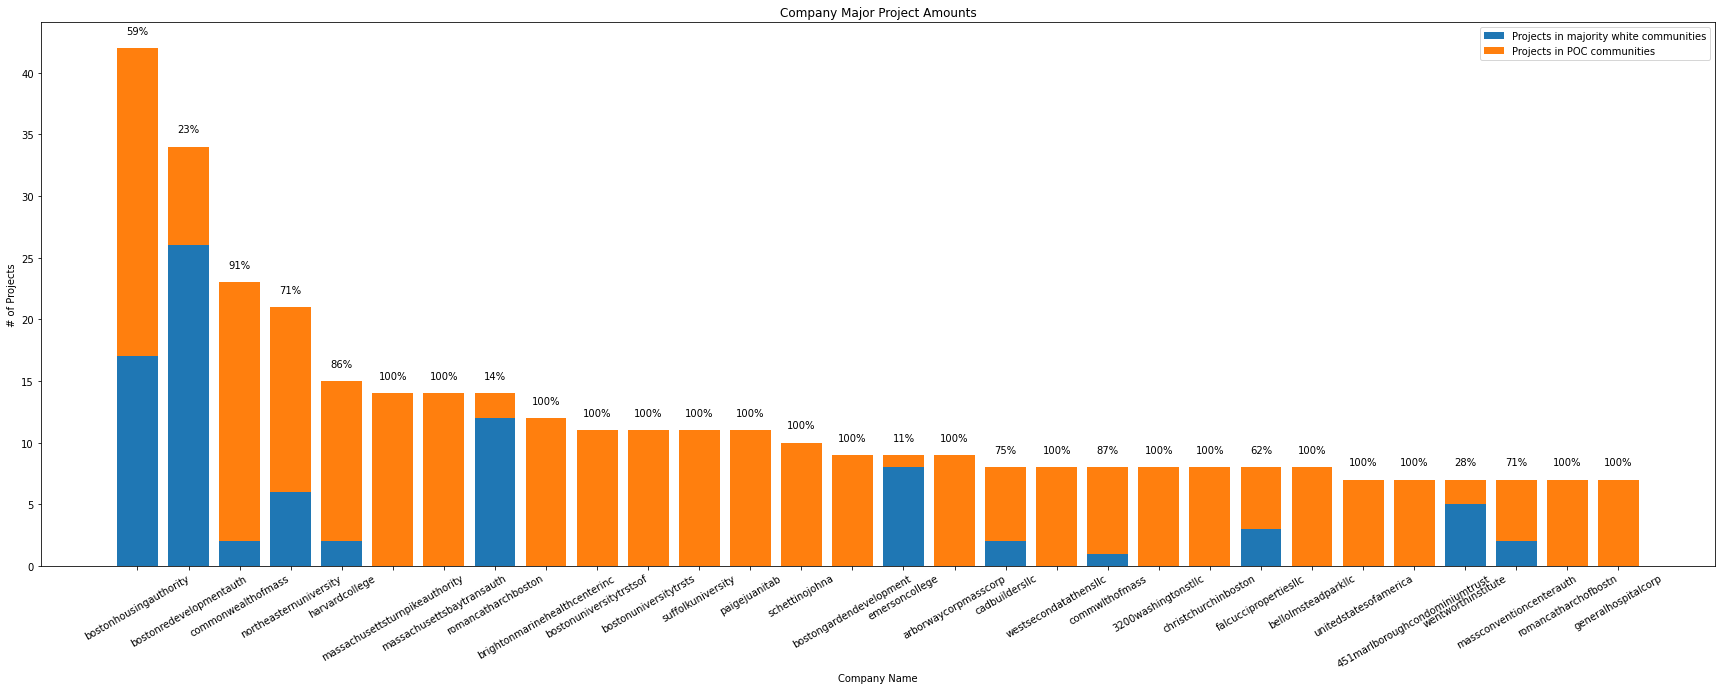

In [129]:
size = 30
num_projects_POC_community = merged_amounts["POC_Community_Projects"].values[:size]
num_projects_nonPOC_community = merged_amounts["Total_Projects"].values[:size] - merged_amounts["POC_Community_Projects"].values[:size]

plt.figure(figsize=[30, 10])
plt.title("Company Major Project Amounts")
plt.xlabel("Company Name")
plt.ylabel("# of Projects")

ind = np.arange(size)
p1 = plt.bar(ind, num_projects_nonPOC_community, label="Projects in majority white communities")
p2 = plt.bar(ind, num_projects_POC_community, label="Projects in POC communities", bottom=num_projects_nonPOC_community)

plt.legend()
xtix = [merged_amounts.index[i] for i in range(size)]
plt.xticks(ind, xtix, rotation = 30)

for i in range(len(p1)):
    rect = p1[i]
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2, merged_amounts["Total_Projects"][i] + 1, '%d%%' % ((num_projects_POC_community[i] / merged_amounts["Total_Projects"][i]) * 100), ha='center', va='bottom')

plt.show()

In [131]:
first_100_POC_community_num = merged_amounts["POC_Community_Projects"].values
first_100_nonPOC_community_num = merged_amounts["Total_Projects"].values - merged_amounts["POC_Community_Projects"].values

print(np.sum(first_100_nonPOC_community_num))
np.sum(first_100_POC_community_num)

first_100_nonPOC_community_num

111


array([17, 26,  2, ...,  0,  0,  0], dtype=int64)